In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from root_pandas import read_root
from __future__ import division
from statsmodels.stats.proportion import proportion_confint
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getDataMatched(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    scalar.append('njets')
    scalar.append('electron_truthPhi')
    scalar.append('electron_truthPt')
    cols.append('matched_truthPhi')
    cols.append('phi')
    cols.append('matched_truthPt')
    cols.append('pt')
    cols.append('matched_truthNComponent')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
file1 = ["$HOME/EIC/output/allsi/710.root"]

In [4]:
a = getDataMatched(file1)


Processed $HOME/EIC/output/allsi/710.root in 86.5 seconds


In [5]:
a.eval('dphi = phi - electron_truthPhi - 3.1415926535', inplace=True)
a0 = fix_dphi(a)

Fixed dphi delta phi range


In [6]:
a0_array = partitionEta(a0, np.arange(-0.1, 13.1, 1), 'njets')

-0.1 < njets < 0.9 0  fraction kept: 0.0
0.9 < njets < 1.9 1055322  fraction kept: 11.5
1.9 < njets < 2.9 2583838  fraction kept: 28.1
2.9 < njets < 3.9 2644872  fraction kept: 28.7
3.9 < njets < 4.9 1716012  fraction kept: 18.6
4.9 < njets < 5.9 810765  fraction kept: 8.8
5.9 < njets < 6.9 292374  fraction kept: 3.2
6.9 < njets < 7.9 81193  fraction kept: 0.9
7.9 < njets < 8.9 17984  fraction kept: 0.2
8.9 < njets < 9.9 2871  fraction kept: 0.0
9.9 < njets < 10.9 340  fraction kept: 0.0
10.9 < njets < 11.9 44  fraction kept: 0.0
11.9 < njets < 12.9 12  fraction kept: 0.0


In [7]:
njet_array_fake = []
for i in range (0, len(a0_array)):
    if i == 0:
        njet_array_fake.append(0)
    else:
        njet_array_fake.append(len(a0_array[i])/i)
print 'njet_array_fake =', njet_array_fake

njet_array_fake = [0, 1055322.0, 1291919.0, 881624.0, 429003.0, 162153.0, 48729.0, 11599.0, 2248.0, 319.0, 34.0, 4.0, 1.0]


In [8]:
a0_dphi = applyCut(a0, 'abs_dphi < 0.4', 'abs_dphi < 0.4 with fakes')
a1 = applyCut(a0, 'matched_truthNComponent != 0', 'without fakes') # removes fake jets
a4 = applyCut(a1, 'abs_dphi < 0.4', 'abs_dphi < 0.4 without fakes')

abs_dphi < 0.4 with fakes 3556132  fraction kept: 38.6
without fakes 8559970  fraction kept: 93.0
abs_dphi < 0.4 without fakes 3378169  fraction kept: 39.5


In [8]:
count_njet(a0_dphi, file_name='710_dphi_fake')
count_njet(a1, file_name='710')
count_njet(a4, file_name='710_dphi')

abs_dphi < 0.4 with fakes 3556132  fraction kept: 38.6
numbers of jet per event array is written to file


In [9]:
njet_array_dphi_fake = read_njet(file_name='710_dphi_fake')
njet_array = read_njet(file_name='710')
njet_array_dphi = read_njet(file_name='710_dphi')
print 'njet_array_dphi_fake =', njet_array_dphi_fake
print 'njet_array =', njet_array
print 'njet_array_dphi =', njet_array_dphi

njet_array_dphi_fake = [0, 2514672, 480771, 25992, 478, 6, 0, 0, 0, 0, 0, 0]
njet_array = [0, 1208713, 1314770, 818736, 358661, 119224, 30477, 6149, 973, 105, 10, 1]
njet_array_dphi = [0, 2528413, 399852, 16397, 214, 1, 0, 0, 0, 0, 0, 0]


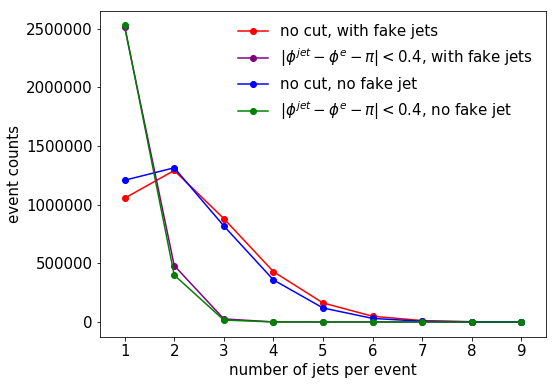

In [12]:
fig = plt.figure(figsize=(8,6))

x = np.arange(1, 10, 1)
plt.plot(x, njet_array_fake[1:10], 'ro-', label='no cut, with fake jets')
plt.plot(x, njet_array_dphi_fake[1:10], color='purple', marker='o', label='$|\phi^{jet}- \phi^e - \pi| < 0.4$, with fake jets')
plt.plot(x, njet_array[1:10], 'bo-', label='no cut, no fake jet')
plt.plot(x, njet_array_dphi[1:10], 'go-', label='$|\phi^{jet}- \phi^e - \pi| < 0.4$, no fake jet')

plt.xlabel('number of jets per event', fontsize=15)
plt.ylabel('event counts', fontsize=15)
plt.xticks(np.arange(1, 10, 1), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(left=0.5, right=9.5)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
#plt.text(0.5, 150000, 'cuts: njet / event = 1', fontsize = 15)
#plt.savefig('images/njet.png', bbox_inches='tight')

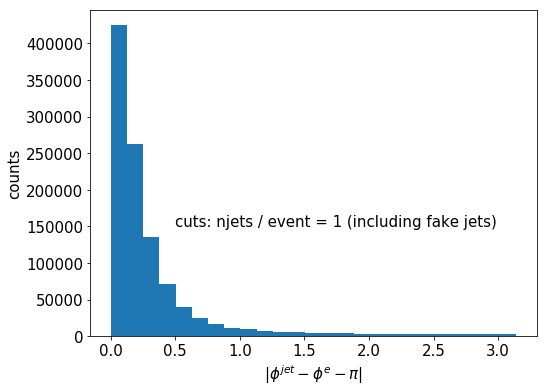

In [13]:
fig = plt.figure(figsize=(8,6))
plt.hist(a0_array[1]['abs_dphi'], bins=25)
plt.xlabel('$|\phi^{jet}- \phi^e - \pi|$', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.5, 150000, 'cuts: njets / event = 1 (including fake jets)', fontsize = 15)
plt.savefig('images/dphi.png', bbox_inches='tight')

In [14]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)

In [ ]:
x1, y1, xerr = getHist(b1['pt_electron'], xvar_array)
x2, y2, xerr = getHist(b['pt_jet'], xvar_array)
plt.errorbar(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), color='r', marker='s', linewidth = 0, fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('Lab frame $p_T \, (\mathrm{GeV/c})$', fontsize=15)
plt.ylabel(r'$10 \, fb^{-1} \times (d\sigma/dp_T)$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,2e2,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, \mathrm{GeV^2}$ \n $|\phi^{jet} - \phi^e - \pi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_dist.pdf', bbox_inches='tight')